In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
%matplotlib inline

In [2]:
def load_halo_summary(filename):
    dtype=[('Nsat','i8'),
           ('vmax', 'f8'),
           ('mstar', 'f8'), 
           ('d', 'f8'),
           ('r_ab_x', 'f8'), ('r_ab_y', 'f8'),('r_ab_z','f8'),
           ('min_r_sat', 'f8'), ('max_r_sat', 'f8'),
           ('a', 'f8'),
           ('b', 'f8'),
           ('c', 'f8'),
           ('Ia_x', 'f8'),
           ('Ia_y', 'f8'),
           ('Ia_z', 'f8'),
           ('plane_width', 'f8'),
           ('plane_distance','f8'),
           ('plane_x','f8'),('plane_y','f8'),('plane_z','f8'),
           ('rand_p_width_mean','f8'),('rand_p_width_std','f8'),
           ('rand_p_center_mean','f8'), ('rand_p_center_std','f8'),
          ('beta', 'f8'),]
    file_data = np.loadtxt(filename, dtype=dtype)    
    return file_data

In [117]:
data_path = "../data/mstar_selected_summary"
file_halo_A = os.path.join(data_path, "halo_A.dat")
file_halo_B = os.path.join(data_path, "halo_B.dat")
obs_path = "../data/obs_summary/"
file_M31 = os.path.join(obs_path, "halo_M31.dat")
file_MW = os.path.join(obs_path, "halo_MW.dat")
hubble = 0.73

In [4]:
data_halo_A = load_halo_summary(file_halo_A)
data_halo_B = load_halo_summary(file_halo_B)
data_M31 = load_halo_summary(file_M31)
data_MW = load_halo_summary(file_MW)

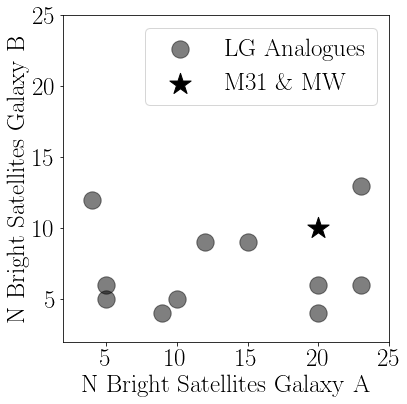

In [5]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['Nsat'], data_halo_B['Nsat'], label='LG Analogues',s=300, alpha=0.5, color='black')
plt.scatter(data_M31['Nsat'], data_MW['Nsat'], label='M31 \& MW', s=500, marker='*', color='black')
plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,30,5))
plt.yticks(np.arange(0,30,5))
plt.xlim([2,25])
plt.ylim([2,25])
plt.legend(loc=1)
plt.xlabel(r"N Bright Satellites Galaxy A")
plt.ylabel(r"N Bright Satellites Galaxy B")
plt.savefig("../paper/nsat.pdf", bbox_inches='tight')

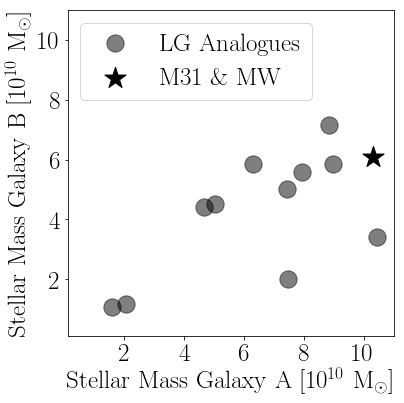

In [9]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['mstar']/hubble, data_halo_B['mstar']/hubble, label='LG Analogues', s=300, alpha=0.5, color='black')
plt.scatter(data_M31['mstar']/hubble, data_MW['mstar']/hubble, label='M31 \& MW', s=500, marker='*', color='black')

plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,20,2))
plt.yticks(np.arange(0,20,2))
plt.xlim([0.1,11])
plt.ylim([0.1,11])
plt.legend(loc=2)
plt.xlabel(r"Stellar Mass Galaxy A [$10^{10}$ M$_{\odot}$]")
plt.ylabel(r"Stellar Mass Galaxy B [$10^{10}$ M$_{\odot}$]")
plt.savefig("../paper/mstar.pdf", bbox_inches='tight')

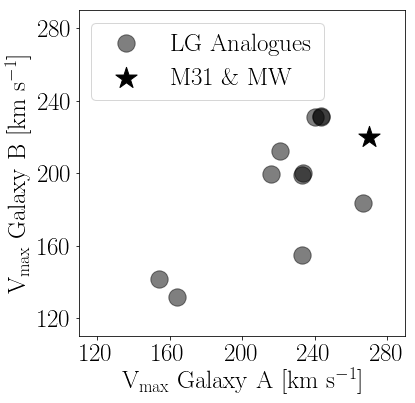

In [10]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['vmax'], data_halo_B['vmax'], label='LG Analogues', s=300, alpha=0.5, color='black')
plt.scatter(data_M31['vmax'], data_MW['vmax'], label='M31 \& MW', s=500, marker='*', color='black')

plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,360,40))
plt.yticks(np.arange(0,360,40))
plt.xlim([110,290])
plt.ylim([110,290])
plt.legend(loc=2)
plt.xlabel(r"V$_{\rm max}$ Galaxy A [km s$^{-1}$]")
plt.ylabel(r"V$_{\rm max}$ Galaxy B [km s$^{-1}$]")
plt.savefig("../paper/vmax.pdf", bbox_inches='tight')

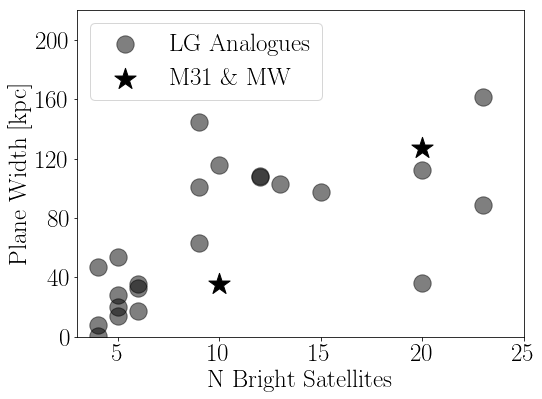

In [11]:
fig = plt.figure(1, figsize=(8,6))
#fig, ax = plt.subplots()

plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)


plt.scatter(data_halo_A['Nsat'], data_halo_A['plane_width']/hubble, label='LG Analogues', 
            s=300, color='black', alpha=0.5)
plt.scatter(data_halo_B['Nsat'], data_halo_B['plane_width']/hubble, 
            s=300, color='black', alpha=0.5)


plt.scatter(data_M31['Nsat'], data_M31['plane_width']/hubble, label='M31 \& MW', 
            s=500, marker='*', color='black')
plt.scatter(data_MW['Nsat'], data_MW['plane_width']/hubble, 
            s=500, marker='*', color='black')



#plt.errorbar(data_halo_A['Nsat'], 
#             data_halo_A['rand_p_width_mean']/hubble, yerr=data_halo_A['rand_p_center_std']/hubble,
#             color='black', fmt='o', capsize=5, alpha=0.3, marker='^', label='Randomization')
#plt.errorbar(data_halo_B['Nsat'], data_halo_B['rand_p_width_mean']/hubble, yerr=data_halo_B['rand_p_center_std']/hubble,
#             color='black', fmt='o', capsize=5, alpha=0.3, marker='v')


#plt.axes().set_aspect('equal', adjustable='datalim')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,360,40))
plt.xlim([3,25])
plt.ylim([0.1,220])
#plt.semilogy()
#plt.semilogx()
plt.xlabel(r"N Bright Satellites")
plt.ylabel(r"Plane Width [kpc]")
plt.legend(loc=2)

plt.savefig("../paper/planes.pdf", bbox_inches='tight')

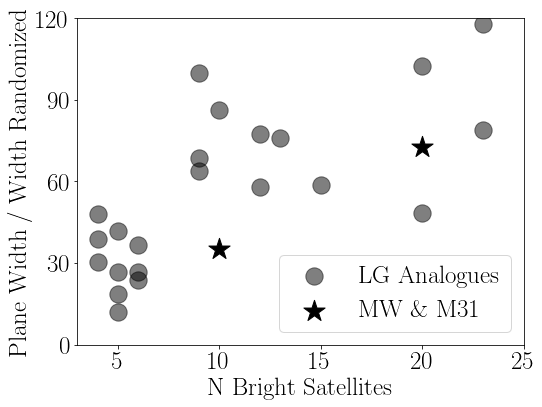

In [109]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.scatter(data_halo_A['Nsat'], data_halo_A['rand_p_width_mean'], label='LG Analogues', 
            s=300, alpha=0.5, color='black')
plt.scatter(data_halo_B['Nsat'], data_halo_B['rand_p_width_mean'], 
            s=300, alpha=0.5, color='black')

plt.scatter(data_M31['Nsat'], data_M31['rand_p_width_mean'], label='MW \& M31', 
            s=500, marker='*', color='black')
plt.scatter(data_MW['Nsat'], data_MW['rand_p_width_mean'], 
            s=500, marker='*', color='black')


#plt.axes().set_aspect('equal', adjustable='datalim')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,400,30))
plt.xlim([3,25])
plt.ylim([0,120])
plt.legend(loc=4)
plt.xlabel(r"N Bright Satellites")
plt.ylabel(r"Plane Width / Width Randomized")
#plt.savefig("../paper/planes_normalized.pdf", bbox_inches='tight')

[13  9  4 12  9  6  5  4  6  6  5] [ 0.98713758  1.15394895  0.18792274  1.35536779  0.67365128  0.65757775
  0.93660219  0.01001945  0.968295    0.53154464  0.55370809]


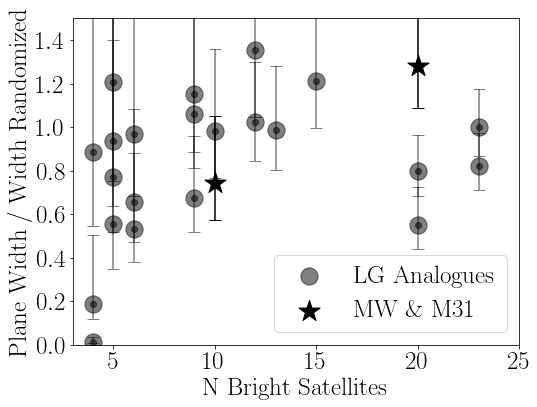

In [145]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

x = data_halo_A['Nsat']
y = data_halo_A['plane_width']/data_halo_A['rand_p_width_mean']
y_err_down = data_halo_A['plane_width']/(data_halo_A['rand_p_width_mean']+data_halo_A['rand_p_width_std'])
y_err_up = data_halo_A['plane_width']/(data_halo_A['rand_p_width_mean']-data_halo_A['rand_p_width_std'])
plt.errorbar(x, y, yerr=[y-y_err_down, y_err_up-y], fmt='o', capsize=6, color='black', alpha=0.5)
plt.scatter(x, y , label='LG Analogues', 
            s=300, alpha=0.5, color='black')

x = data_halo_B['Nsat']
y = data_halo_B['plane_width']/data_halo_B['rand_p_width_mean']
y_err_down = data_halo_B['plane_width']/(data_halo_B['rand_p_width_mean']+data_halo_B['rand_p_width_std'])
y_err_up = data_halo_B['plane_width']/(data_halo_B['rand_p_width_mean']-data_halo_B['rand_p_width_std'])
plt.errorbar(x, y, yerr=[y-y_err_down, y_err_up-y], fmt='o', capsize=6, color='black', alpha=0.5)
plt.scatter(x, y, s=300, alpha=0.5, color='black')
print(x, y)


x = data_M31['Nsat']
y = data_M31['plane_width']/data_M31['rand_p_width_mean']
y_err_down = data_M31['plane_width']/(data_M31['rand_p_width_mean']+data_M31['rand_p_width_std'])
y_err_up = data_M31['plane_width']/(data_M31['rand_p_width_mean']-data_M31['rand_p_width_std'])
plt.errorbar([x], [y], yerr=[[y-y_err_down], [y_err_up-y]], fmt='o', capsize=6, color='k')
plt.scatter(x, y, label='MW \& M31', 
            s=500, marker='*', color='black')


x = data_MW['Nsat']
y = data_MW['plane_width']/data_MW['rand_p_width_mean']
y_err_down = data_MW['plane_width']/(data_MW['rand_p_width_mean']+data_MW['rand_p_width_std'])
y_err_up = data_MW['plane_width']/(data_MW['rand_p_width_mean']-data_MW['rand_p_width_std'])
plt.errorbar([x], [y], yerr=[[y-y_err_down], [y_err_up-y]], fmt='o', capsize=6, color='k')
plt.scatter(x, y, s=500, marker='*', color='black')


#plt.axes().set_aspect('equal', adjustable='datalim')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,2,0.2))
plt.xlim([3,25])
plt.ylim([0,1.5])
plt.legend(loc=4)
plt.xlabel(r"N Bright Satellites")
plt.ylabel(r"Plane Width / Width Randomized")
plt.savefig("../paper/planes_normalized.pdf", bbox_inches='tight')

[ 0.99988558  1.21078795  0.79975128  0.88398276  1.02435723  0.82044421
  0.98061518  1.0603158   0.54742374  1.20818235  0.77050352] [ 0.98713758  1.15394895  0.18792274  1.35536779  0.67365128  0.65757775
  0.93660219  0.01001945  0.968295    0.53154464  0.55370809]


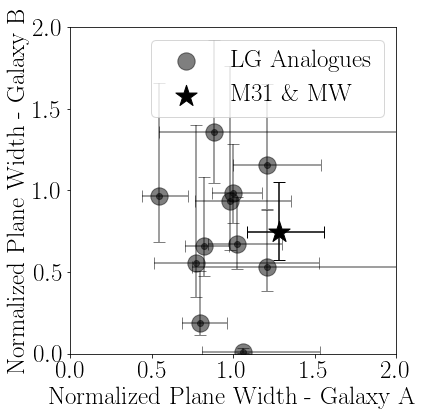

In [158]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)



x = data_halo_A['plane_width']/data_halo_A['rand_p_width_mean']
x_err_down = data_halo_A['plane_width']/(data_halo_A['rand_p_width_mean']+data_halo_A['rand_p_width_std'])
x_err_up = data_halo_A['plane_width']/(data_halo_A['rand_p_width_mean']-data_halo_A['rand_p_width_std'])
y = data_halo_B['plane_width']/data_halo_B['rand_p_width_mean']
y_err_down = data_halo_B['plane_width']/(data_halo_B['rand_p_width_mean']+data_halo_B['rand_p_width_std'])
y_err_up = data_halo_B['plane_width']/(data_halo_B['rand_p_width_mean']-data_halo_B['rand_p_width_std'])
plt.errorbar(x, y, yerr=[y-y_err_down, y_err_up-y], xerr=[x-x_err_down, x_err_up-x],
                 fmt='o', capsize=6, color='black', alpha=0.5)
plt.scatter(x, y, s=300, alpha=0.5, color='black', label='LG Analogues')
print(x, y)


x = data_M31['Nsat']
x = data_M31['plane_width']/data_M31['rand_p_width_mean']
x_err_down = data_M31['plane_width']/(data_M31['rand_p_width_mean']+data_M31['rand_p_width_std'])
x_err_up = data_M31['plane_width']/(data_M31['rand_p_width_mean']-data_M31['rand_p_width_std'])

y = data_MW['plane_width']/data_MW['rand_p_width_mean']
y_err_down = data_MW['plane_width']/(data_MW['rand_p_width_mean']+data_MW['rand_p_width_std'])
y_err_up = data_MW['plane_width']/(data_MW['rand_p_width_mean']-data_MW['rand_p_width_std'])
plt.errorbar([x], [y], yerr=[[y-y_err_down], [y_err_up-y]], xerr=[[x-x_err_down], [x_err_up-x]],
             fmt='o', capsize=6, color='k')
plt.scatter(x, y, s=500, marker='*', color='black', label='M31 \& MW')


plt.axes().set_aspect('equal')#, adjustable='datalim')
plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,4,0.5))
plt.xlim([0,2.0])
plt.ylim([0,2.0])
plt.legend(loc=1)
plt.xlabel(r"Normalized Plane Width - Galaxy A")
plt.ylabel(r"Normalized Plane Width - Galaxy B")
plt.savefig("../paper/planes_scatter.pdf", bbox_inches='tight')

1.06033546067 0.258255948129


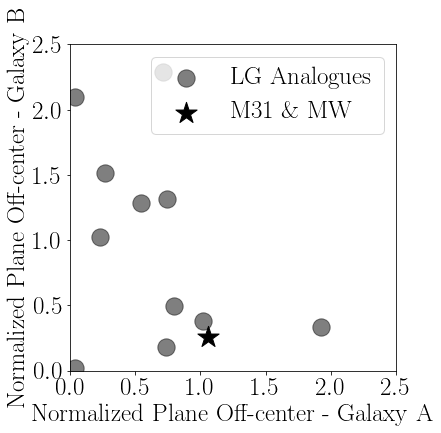

In [191]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)



x = np.abs(data_halo_A['plane_distance']/data_halo_A['rand_p_center_std'])
#x_err_down = data_halo_A['plane_distance']/(data_halo_A['rand_p_width_mean']+data_halo_A['rand_p_width_std'])
#x_err_up = data_halo_A['plane_distance']/(data_halo_A['rand_p_witdh_mean']-data_halo_A['rand_p_width_std'])

y = np.abs(data_halo_B['plane_distance']/data_halo_B['rand_p_center_std'])
#y_err_down = data_halo_B['plane_distance']/(data_halo_B['rand_p_width_mean']+data_halo_B['rand_p_width_std'])
#y_err_up = data_halo_B['plane_distance']/(data_halo_B['rand_p_center_mean']-data_halo_B['rand_p_center_std'])
#plt.errorbar(x, y, yerr=[y-y_err_down, y_err_up-y], xerr=[x-x_err_down, x_err_up-x],
#                 fmt='o', capsize=6, color='black', alpha=0.5)
plt.scatter(x, y, s=300, alpha=0.5, color='black', label='LG Analogues')


x = np.abs(data_M31['plane_distance']/data_M31['rand_p_center_std'])
#x_err_down = data_M31['plane_distance']/(data_M31['rand_p_width_mean']+data_M31['rand_p_width_std'])
#x_err_up = data_M31['plane_width']/(data_M31['rand_p_width_mean']-data_M31['rand_p_width_std'])

y = np.abs(data_MW['plane_distance']/data_MW['rand_p_center_std'])
#y_err_down = data_MW['plane_width']/(data_MW['rand_p_width_mean']+data_MW['rand_p_width_std'])
#y_err_up = data_MW['plane_width']/(data_MW['rand_p_width_mean']-data_MW['rand_p_width_std'])
#plt.errorbar([x], [y], yerr=[[y-y_err_down], [y_err_up-y]], xerr=[[x-x_err_down], [x_err_up-x]],
#             fmt='o', capsize=6, color='k')
print(x,y)
plt.scatter(x, y, s=500, marker='*', color='black', label='M31 \& MW')


plt.axes().set_aspect('equal')#, adjustable='datalim')
plt.xticks(np.arange(-4,4,0.5))
plt.yticks(np.arange(-4,4,0.5))
plt.xlim([-0,2.5])
plt.ylim([-0,2.5])
plt.legend(loc=1)
plt.xlabel(r"Normalized Plane Off-center - Galaxy A")
plt.ylabel(r"Normalized Plane Off-center - Galaxy B")
plt.savefig("../paper/planes_center_scatter.pdf", bbox_inches='tight')

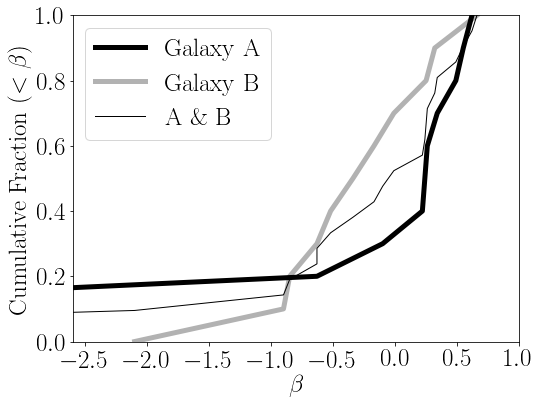

In [13]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)
sorted_A = np.sort(data_halo_A['beta'])
sorted_B = np.sort(data_halo_B['beta'])



plt.plot(sorted_A, cum_profile, label='Galaxy A', color='black', linewidth=5)
plt.plot(sorted_B, cum_profile, label='Galaxy B', color='black', linewidth=5, alpha=0.3)

sorted_AB = np.sort(np.concatenate((sorted_A, sorted_B)))
cum_profile_AB = np.linspace(0,1.0, n_points*2)
plt.plot(sorted_AB, cum_profile_AB, label='A \& B', color='black', linewidth=1)

#plt.axes().set_aspect('equal'
plt.xticks(np.arange(-6,2,0.5))
plt.yticks(np.arange(0,2,0.2))
plt.xlim([-2.6,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\beta$")
plt.ylabel(r"Cumulative Fraction ($<\beta$)")
plt.savefig("../paper/beta.pdf", bbox_inches='tight')

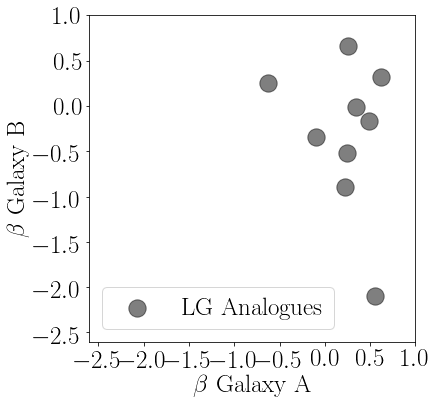

In [14]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)
sorted_A = np.sort(data_halo_A['beta'])
sorted_B = np.sort(data_halo_B['beta'])


plt.scatter(data_halo_A['beta'], data_halo_B['beta'], label='LG Analogues', s=300, alpha=0.5, color='black')

sorted_AB = np.sort(np.concatenate((sorted_A, sorted_B)))
cum_profile_AB = np.linspace(0,1.0, n_points*2)
#plt.plot(sorted_AB, cum_profile_AB, label='A+B', color='black', linewidth=1)

plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.5))
plt.yticks(np.arange(-6,2,0.5))
plt.xlim([-2.6,1])
plt.ylim([-2.6,1])
plt.legend(loc=3)
plt.xlabel(r"$\beta$ Galaxy A")
plt.ylabel(r"$\beta$ Galaxy B")
plt.savefig("../paper/beta_scatter.pdf", bbox_inches='tight')

0.3
42.4


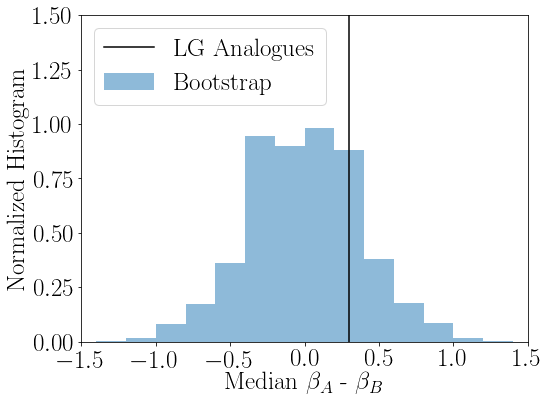

In [15]:
fig = plt.figure(1, figsize=(8,6))
data_A = data_halo_A['beta']
data_B = data_halo_B['beta']
all_data = np.concatenate((data_A, data_B))
n_points = len(all_data)
ids = np.arange(n_points)

KS_value_0 = np.percentile(data_A - data_B, q=50)
n_values = 10000
KS_values = np.zeros(n_values)
print(KS_value_0)
for i in range(n_values):
    id_A = np.random.choice(ids, size=len(data_A),replace=False)
    id_B = np.array(list(set(ids)-set(id_A)))
    KS_values[i] = np.percentile(all_data[id_A] - all_data[id_B],q=50)
    
a = plt.hist(KS_values, bins=np.arange(-1.6,1.6,0.2), alpha=0.5, normed=True, label='Bootstrap')
a = plt.xticks(np.arange(-3,3,0.5))
plt.xlim([-1.5,1.5])
plt.ylim([0,1.5])

plt.axvline(x=KS_value_0, color='black', label='LG Analogues')


plt.xlabel(r"Median $\beta_A$ - $\beta_B$")
plt.ylabel(r"Normalized Histogram")
plt.legend()
print(100*np.count_nonzero((np.abs(KS_values)>np.abs(KS_value_0)))/n_values)
plt.savefig("../paper/beta_bootstrap.pdf", bbox_inches='tight')

[ 0.14179441  0.35709629  0.33113015  0.13134015  0.71302655  0.37198394
  0.51240644  0.50893118  0.02293578  0.79503811  0.16337711]


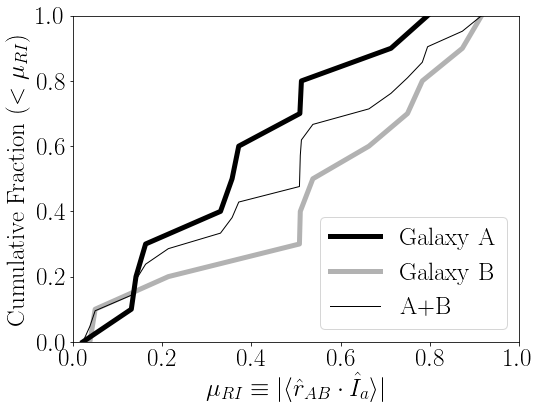

In [16]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)
mu_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['Ia_x']
           +data_halo_A['r_ab_y']*data_halo_A['Ia_y']
           +data_halo_A['r_ab_z']*data_halo_A['Ia_z'])/norm_r
sorted_mu_A = np.sort(mu_A)

mu_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['Ia_x']
           +data_halo_B['r_ab_y']*data_halo_B['Ia_y']
           +data_halo_B['r_ab_z']*data_halo_B['Ia_z'])/norm_r
sorted_mu_B = np.sort(mu_B)

print(mu_A)
plt.plot(sorted_mu_A, cum_profile, label='Galaxy A', color='black', linewidth=5)
plt.plot(sorted_mu_B, cum_profile, label='Galaxy B', color='black', linewidth=5, alpha=0.3)

sorted_AB = np.sort(np.concatenate((sorted_mu_A, sorted_mu_B)))
cum_profile_AB = np.linspace(0,1.0, n_points*2)
plt.plot(sorted_AB, cum_profile_AB, label='A+B', color='black', linewidth=1)

#plt.plot(sorted_B, cum_profile, label='Galaxy B', color='black', linewidth=4, alpha=0.3)

#plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=4)
plt.xlabel(r"$\mu_{RI}\equiv |\langle\hat{r}_{AB}\cdot \hat{I}_a\rangle|$")
plt.ylabel(r"Cumulative Fraction ($<\mu_{RI}$)")
plt.savefig("../paper/mu_ri_cum.pdf", bbox_inches='tight')

[ 0.14179441  0.35709629  0.33113015  0.13134015  0.71302655  0.37198394
  0.51240644  0.50893118  0.02293578  0.79503811  0.16337711]


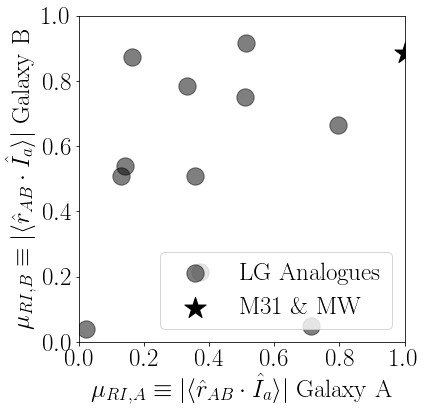

In [17]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)
mu_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['Ia_x']
           +data_halo_A['r_ab_y']*data_halo_A['Ia_y']
           +data_halo_A['r_ab_z']*data_halo_A['Ia_z'])/norm_r
sorted_mu_A = np.sort(mu_A)

mu_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['Ia_x']
           +data_halo_B['r_ab_y']*data_halo_B['Ia_y']
           +data_halo_B['r_ab_z']*data_halo_B['Ia_z'])/norm_r
sorted_mu_B = np.sort(mu_B)

norm_r = np.sqrt(data_M31['r_ab_x']**2 + data_M31['r_ab_y']**2 + data_M31['r_ab_z']**2)
mu_M31 = np.abs(data_M31['r_ab_x']*data_M31['Ia_x']
           +data_M31['r_ab_y']*data_M31['Ia_y']
           +data_M31['r_ab_z']*data_M31['Ia_z'])/norm_r

norm_r = np.sqrt(data_MW['r_ab_x']**2 + data_MW['r_ab_y']**2 + data_MW['r_ab_z']**2)
mu_MW = np.abs(data_MW['r_ab_x']*data_MW['Ia_x']
           +data_MW['r_ab_y']*data_MW['Ia_y']
           +data_MW['r_ab_z']*data_MW['Ia_z'])/norm_r

print(mu_A)
plt.scatter(mu_A, mu_B, label='LG Analogues', s=300, alpha=0.5, color='black')
plt.scatter(mu_M31, mu_MW, label='M31 \& MW', s=500, marker='*', color='black')


plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=4)
plt.xlabel(r"$\mu_{RI,A}\equiv |\langle\hat{r}_{AB}\cdot \hat{I}_a\rangle|$ Galaxy A")
plt.ylabel(r"$\mu_{RI,B}\equiv |\langle\hat{r}_{AB}\cdot \hat{I}_a\rangle|$ Galaxy B")

plt.savefig("../paper/mu_ri_scatter.pdf", bbox_inches='tight')

-0.24109999883
13.77


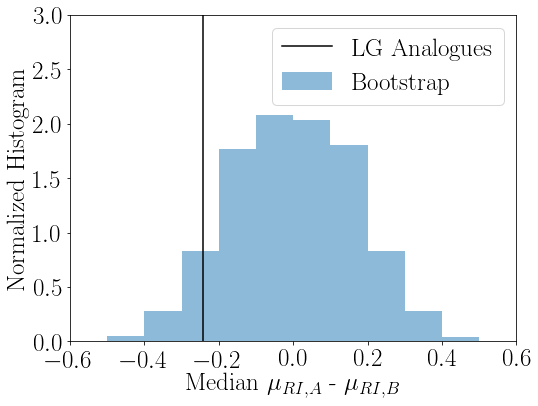

In [18]:
fig = plt.figure(1, figsize=(8,6))

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)

data_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['Ia_x']
           +data_halo_A['r_ab_y']*data_halo_A['Ia_y']
           +data_halo_A['r_ab_z']*data_halo_A['Ia_z'])/norm_r
data_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['Ia_x']
           +data_halo_B['r_ab_y']*data_halo_B['Ia_y']
           +data_halo_B['r_ab_z']*data_halo_B['Ia_z'])/norm_r

all_data = np.concatenate((data_A, data_B))
n_points = len(all_data)
ids = np.arange(n_points)
KS_value_0 = np.percentile(data_A - data_B, q=50) 
n_values = 10000
KS_values = np.zeros(n_values)
print(KS_value_0)
for i in range(n_values):
    id_A = np.random.choice(ids, size=len(data_A), replace=False)
    id_B = np.array(list(set(ids)-set(id_A)))
    KS_values[i] = np.percentile(all_data[id_A] - all_data[id_B],q=50)
a = plt.hist(KS_values, bins=np.arange(-0.5,0.6,0.1), alpha=0.5, normed=True, label='Bootstrap')
a = plt.xticks(np.arange(-1,1,0.2))
plt.xlim([-0.6,0.6])
plt.ylim([0,3.0])
plt.axvline(x=KS_value_0, color='black', label='LG Analogues')
plt.xlabel(r"Median $\mu_{RI,A}$ - $\mu_{RI,B}$")
plt.ylabel(r"Normalized Histogram")
plt.legend()
print(100*np.count_nonzero(np.abs(KS_values)>np.abs(KS_value_0))/n_values)
plt.savefig("../paper/mu_ri_bootstrap.pdf", bbox_inches='tight')

[ 0.2031599   0.91695205  0.72249356  0.08576213  0.68564797  0.2019875
  0.68971402  0.68833803  0.04601159  0.86743237  0.74722904]


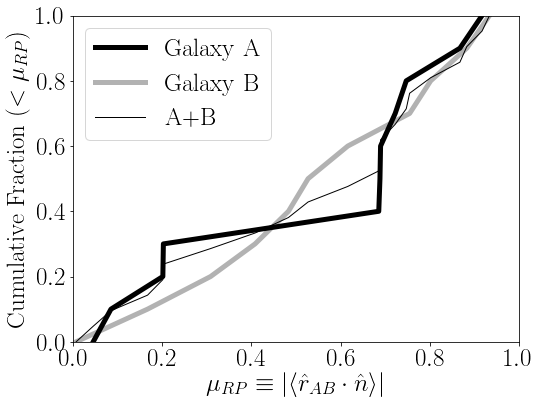

In [19]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)
mu_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['plane_x']
           +data_halo_A['r_ab_y']*data_halo_A['plane_y']
           +data_halo_A['r_ab_z']*data_halo_A['plane_z'])/norm_r
sorted_mu_A = np.sort(mu_A)

mu_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['plane_x']
           +data_halo_B['r_ab_y']*data_halo_B['plane_y']
           +data_halo_B['r_ab_z']*data_halo_B['plane_z'])/norm_r
sorted_mu_B = np.sort(mu_B)

print(mu_A)
plt.plot(sorted_mu_A, cum_profile, label='Galaxy A', color='black', linewidth=5)
plt.plot(sorted_mu_B, cum_profile, label='Galaxy B', color='black', linewidth=5, alpha=0.3)

sorted_AB = np.sort(np.concatenate((sorted_mu_A, sorted_mu_B)))
cum_profile_AB = np.linspace(0,1.0, n_points*2)
plt.plot(sorted_AB, cum_profile_AB, label='A+B', color='black', linewidth=1)

#plt.plot(sorted_B, cum_profile, label='Galaxy B', color='black', linewidth=4, alpha=0.3)

#plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\mu_{RP}\equiv |\langle\hat{r}_{AB}\cdot \hat{n}\rangle|$")
plt.ylabel(r"Cumulative Fraction ($<\mu_{RP}$)")
plt.savefig("../paper/mu_rp_cum.pdf", bbox_inches='tight')

[ 0.2031599   0.91695205  0.72249356  0.08576213  0.68564797  0.2019875
  0.68971402  0.68833803  0.04601159  0.86743237  0.74722904]


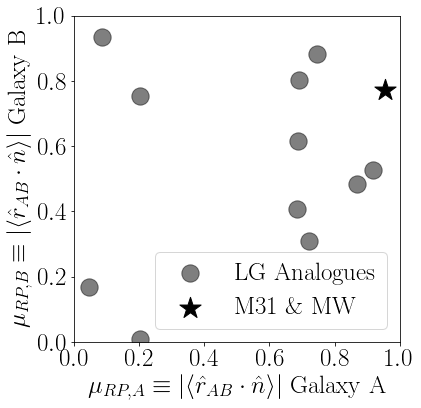

In [20]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)
mu_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['plane_x']
           +data_halo_A['r_ab_y']*data_halo_A['plane_y']
           +data_halo_A['r_ab_z']*data_halo_A['plane_z'])/norm_r
sorted_mu_A = np.sort(mu_A)

mu_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['plane_x']
           +data_halo_B['r_ab_y']*data_halo_B['plane_y']
           +data_halo_B['r_ab_z']*data_halo_B['plane_z'])/norm_r
sorted_mu_B = np.sort(mu_B)

norm_r = np.sqrt(data_M31['r_ab_x']**2 + data_M31['r_ab_y']**2 + data_M31['r_ab_z']**2)
mu_M31 = np.abs(data_M31['r_ab_x']*data_M31['plane_x']
           +data_M31['r_ab_y']*data_M31['plane_y']
           +data_M31['r_ab_z']*data_M31['plane_z'])/norm_r

norm_r = np.sqrt(data_MW['r_ab_x']**2 + data_MW['r_ab_y']**2 + data_MW['r_ab_z']**2)
mu_MW = np.abs(data_MW['r_ab_x']*data_MW['plane_x']
           +data_MW['r_ab_y']*data_MW['plane_y']
           +data_MW['r_ab_z']*data_MW['plane_z'])/norm_r

print(mu_A)
plt.scatter(mu_A, mu_B, label='LG Analogues', s=300, alpha=0.5, color='black')
plt.scatter(mu_M31, mu_MW, label='M31 \& MW', s=500, marker='*', color='black')


plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=4)
plt.xlabel(r"$\mu_{RP,A}\equiv |\langle\hat{r}_{AB}\cdot \hat{n}\rangle|$ Galaxy A")
plt.ylabel(r"$\mu_{RP,B}\equiv |\langle\hat{r}_{AB}\cdot \hat{n}\rangle|$ Galaxy B")

plt.savefig("../paper/mu_rp_scatter.pdf", bbox_inches='tight')

0.0720672731689
63.94


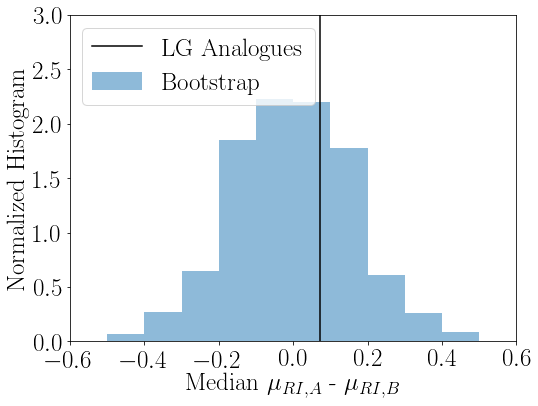

In [21]:
fig = plt.figure(1, figsize=(8,6))

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)

data_A = np.abs(data_halo_A['r_ab_x']*data_halo_A['plane_x']
           +data_halo_A['r_ab_y']*data_halo_A['plane_y']
           +data_halo_A['r_ab_z']*data_halo_A['plane_z'])/norm_r
data_B = np.abs(data_halo_B['r_ab_x']*data_halo_B['plane_x']
           +data_halo_B['r_ab_y']*data_halo_B['plane_y']
           +data_halo_B['r_ab_z']*data_halo_B['plane_z'])/norm_r

all_data = np.concatenate((data_A, data_B))
n_points = len(all_data)
ids = np.arange(n_points)
KS_value_0 = np.percentile(data_A - data_B, q=50) 
n_values = 10000
KS_values = np.zeros(n_values)
print(KS_value_0)
for i in range(n_values):
    id_A = np.random.choice(ids, size=len(data_A), replace=False)
    id_B = np.array(list(set(ids)-set(id_A)))
    KS_values[i] = np.percentile(all_data[id_A] - all_data[id_B],q=50)
a = plt.hist(KS_values, bins=np.arange(-0.5,0.6,0.1), alpha=0.5, normed=True, label='Bootstrap')
a = plt.xticks(np.arange(-1,1,0.2))
plt.xlim([-0.6,0.6])
plt.ylim([0,3.0])
plt.axvline(x=KS_value_0, color='black', label='LG Analogues')
plt.xlabel(r"Median $\mu_{RI,A}$ - $\mu_{RI,B}$")
plt.ylabel(r"Normalized Histogram")
plt.legend()
print(100*np.count_nonzero(np.abs(KS_values)>np.abs(KS_value_0))/n_values)
plt.savefig("../paper/mu_rp_bootstrap.pdf", bbox_inches='tight')

[ 0.9339455   0.6997512   0.88500124  0.99684828  0.8628742   0.97908714
  0.94871984  0.75773848  0.99291448  0.9913354   0.77113999]


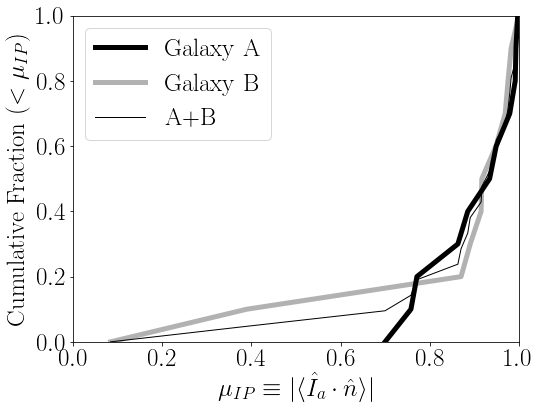

In [22]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

mu_A = np.abs(data_halo_A['Ia_x']*data_halo_A['plane_x']
           +data_halo_A['Ia_y']*data_halo_A['plane_y']
           +data_halo_A['Ia_z']*data_halo_A['plane_z'])
sorted_mu_A = np.sort(mu_A)

mu_B = np.abs(data_halo_B['Ia_x']*data_halo_B['plane_x']
           +data_halo_B['Ia_y']*data_halo_B['plane_y']
           +data_halo_B['Ia_z']*data_halo_B['plane_z'])
sorted_mu_B = np.sort(mu_B)

print(mu_A)
plt.plot(sorted_mu_A, cum_profile, label='Galaxy A', color='black', linewidth=5)
plt.plot(sorted_mu_B, cum_profile, label='Galaxy B', color='black', linewidth=5, alpha=0.3)

sorted_AB = np.sort(np.concatenate((sorted_mu_A, sorted_mu_B)))
cum_profile_AB = np.linspace(0,1.0, n_points*2)
plt.plot(sorted_AB, cum_profile_AB, label='A+B', color='black', linewidth=1)

#plt.plot(sorted_B, cum_profile, label='Galaxy B', color='black', linewidth=4, alpha=0.3)

#plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\mu_{IP}\equiv |\langle\hat{I}_{a}\cdot \hat{n}\rangle|$")
plt.ylabel(r"Cumulative Fraction ($<\mu_{IP}$)")
plt.savefig("../paper/mu_ip_cum.pdf", bbox_inches='tight')

[ 0.9339455   0.6997512   0.88500124  0.99684828  0.8628742   0.97908714
  0.94871984  0.75773848  0.99291448  0.9913354   0.77113999]


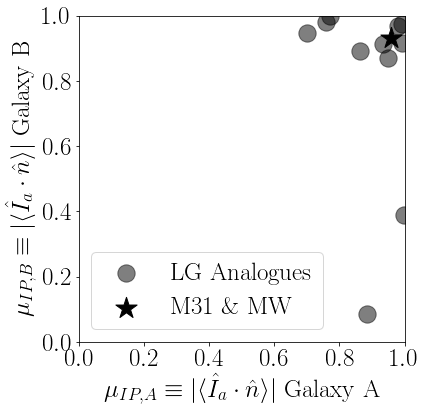

In [23]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

mu_A = np.abs(data_halo_A['Ia_x']*data_halo_A['plane_x']
           +data_halo_A['Ia_y']*data_halo_A['plane_y']
           +data_halo_A['Ia_z']*data_halo_A['plane_z'])
sorted_mu_A = np.sort(mu_A)

mu_B = np.abs(data_halo_B['Ia_x']*data_halo_B['plane_x']
           +data_halo_B['Ia_y']*data_halo_B['plane_y']
           +data_halo_B['Ia_z']*data_halo_B['plane_z'])
sorted_mu_B = np.sort(mu_B)

mu_M31 = np.abs(data_M31['Ia_x']*data_M31['plane_x']
           +data_M31['Ia_y']*data_M31['plane_y']
           +data_M31['Ia_z']*data_M31['plane_z'])

mu_MW = np.abs(data_MW['Ia_x']*data_MW['plane_x']
           +data_MW['Ia_y']*data_MW['plane_y']
           +data_MW['Ia_z']*data_MW['plane_z'])

print(mu_A)
plt.scatter(mu_A, mu_B, label='LG Analogues', s=300, alpha=0.5, color='black')
plt.scatter(mu_M31, mu_MW, label='M31 \& MW', s=500, marker='*', color='black')


plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=3)
plt.xlabel(r"$\mu_{IP,A}\equiv |\langle\hat{I}_{a}\cdot \hat{n}\rangle|$ Galaxy A")
plt.ylabel(r"$\mu_{IP,B}\equiv |\langle\hat{I}_{a}\cdot \hat{n}\rangle|$ Galaxy B")

plt.savefig("../paper/mu_ip_scatter.pdf", bbox_inches='tight')

0.01609429
70.27


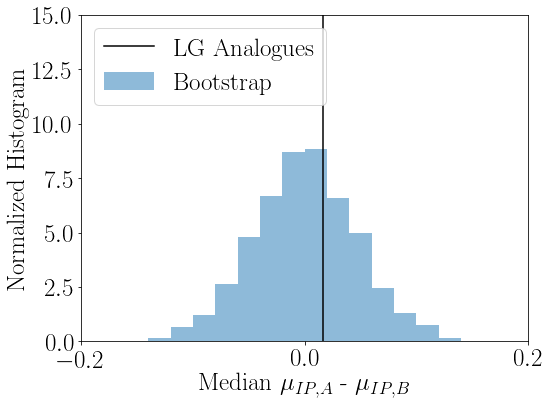

In [24]:
fig = plt.figure(1, figsize=(8,6))


data_A = np.abs(data_halo_A['Ia_x']*data_halo_A['plane_x']
           +data_halo_A['Ia_y']*data_halo_A['plane_y']
           +data_halo_A['Ia_z']*data_halo_A['plane_z'])
data_B = np.abs(data_halo_B['Ia_x']*data_halo_B['plane_x']
           +data_halo_B['Ia_y']*data_halo_B['plane_y']
           +data_halo_B['Ia_z']*data_halo_B['plane_z'])

all_data = np.concatenate((data_A, data_B))
n_points = len(all_data)
ids = np.arange(n_points)
KS_value_0 = np.percentile(data_A - data_B, q=50) 
n_values = 10000
KS_values = np.zeros(n_values)
print(KS_value_0)
for i in range(n_values):
    id_A = np.random.choice(ids, size=len(data_A), replace=False)
    id_B = np.array(list(set(ids)-set(id_A)))
    KS_values[i] = np.percentile(all_data[id_A] - all_data[id_B],q=50)
a = plt.hist(KS_values, bins=np.arange(-0.2,0.2,0.02), alpha=0.5, normed=True, label='Bootstrap')
a = plt.xticks(np.arange(-1,1,0.2))
plt.xlim([-0.2,0.2])
plt.ylim([0,15.0])
plt.axvline(x=KS_value_0, color='black', label='LG Analogues')
plt.xlabel(r"Median $\mu_{IP,A}$ - $\mu_{IP,B}$")
plt.ylabel(r"Normalized Histogram")
plt.legend(loc=2)
print(100*np.count_nonzero(np.abs(KS_values)>np.abs(KS_value_0))/n_values)
plt.savefig("../paper/mu_ip_bootstrap.pdf", bbox_inches='tight')

[ 0.79432305  0.55343562  0.65183153  0.78715137  0.38587533  0.8241007
  0.31821424  0.16568925  0.2288814   0.70074874  0.55274408]


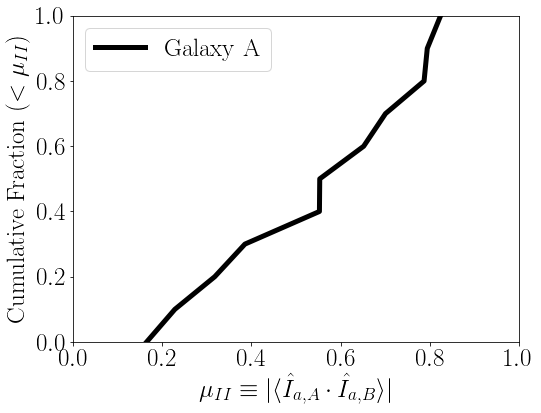

In [25]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

mu_A = np.abs(data_halo_B['Ia_x']*data_halo_A['Ia_x']
           +data_halo_B['Ia_y']*data_halo_A['Ia_y']
           +data_halo_B['Ia_z']*data_halo_A['Ia_z'])
sorted_mu_A = np.sort(mu_A)

print(mu_A)
plt.plot(sorted_mu_A, cum_profile, label='Galaxy A', color='black', linewidth=5)

#plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\mu_{II}\equiv |\langle\hat{I}_{a,A}\cdot \hat{I}_{a,B}\rangle|$")
plt.ylabel(r"Cumulative Fraction ($<\mu_{II}$)")
plt.savefig("../paper/mu_ii_cum.pdf", bbox_inches='tight')

[  2.84319940e-01   5.03948180e-01   2.95474170e-01   1.60845860e-01
   9.37709510e-01   9.71414590e-01   6.48801880e-01   7.12057200e-02
   1.32000000e-06   5.93666860e-01   9.11619460e-01]


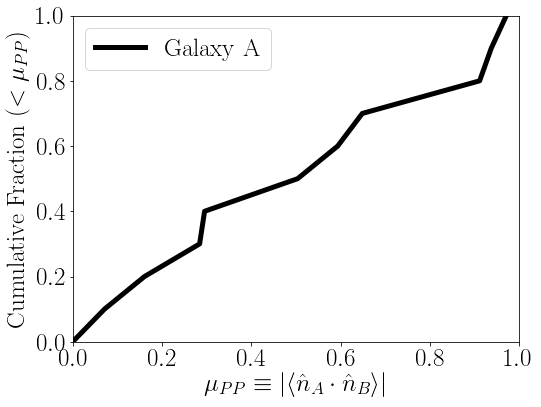

In [26]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

mu_A = np.abs(data_halo_B['plane_x']*data_halo_A['plane_x']
           +data_halo_B['plane_y']*data_halo_A['plane_y']
           +data_halo_B['plane_z']*data_halo_A['plane_z'])
sorted_mu_A = np.sort(mu_A)

print(mu_A)
plt.plot(sorted_mu_A, cum_profile, label='Galaxy A', color='black', linewidth=5)

#plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\mu_{PP}\equiv |\langle\hat{n}_{A}\cdot \hat{n}_{B}\rangle|$")
plt.ylabel(r"Cumulative Fraction ($<\mu_{PP}$)")
plt.savefig("../paper/mu_pp_cum.pdf", bbox_inches='tight')

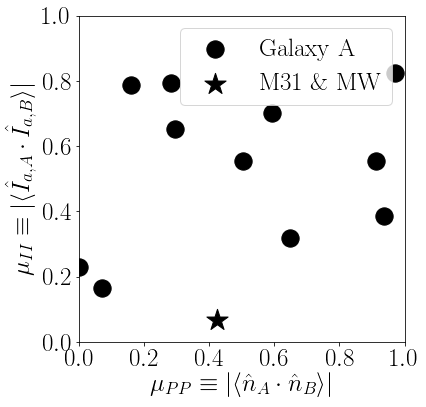

In [27]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

n_points = len(data_halo_A['beta'])
cum_profile = np.linspace(0,1.0, n_points)

mu_p = np.abs(data_halo_B['plane_x']*data_halo_A['plane_x']
           +data_halo_B['plane_y']*data_halo_A['plane_y']
           +data_halo_B['plane_z']*data_halo_A['plane_z'])

mu_i = np.abs(data_halo_B['Ia_x']*data_halo_A['Ia_x']
           +data_halo_B['Ia_y']*data_halo_A['Ia_y']
           +data_halo_B['Ia_z']*data_halo_A['Ia_z'])

mu_LG_i = np.abs(data_M31['Ia_x']*data_MW['Ia_x']
           +data_M31['Ia_y']*data_MW['Ia_x']
           +data_M31['Ia_z']*data_MW['Ia_x'])

mu_LG_p = np.abs(data_M31['plane_x']*data_MW['plane_x']
           +data_M31['plane_y']*data_MW['plane_x']
           +data_M31['plane_z']*data_MW['plane_x'])

plt.scatter(mu_p, mu_i, label='Galaxy A', color='black', s=300)
plt.scatter(mu_LG_p, mu_LG_i, label='M31 \& MW', color='black', s=500, marker='*')

plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=1)
plt.xlabel(r"$\mu_{PP}\equiv |\langle\hat{n}_{A}\cdot \hat{n}_{B}\rangle|$")
plt.ylabel(r"$\mu_{II}\equiv |\langle\hat{I}_{a,A}\cdot \hat{I}_{a,B}\rangle|$")
plt.savefig("../paper/mu_ppii_scatter.pdf", bbox_inches='tight')

In [28]:
a = np.array([[1, 0,0], [0, 1,0], [0,0,1]])
np.linalg.det(a)

1.0

11
0.863471186059 0.971108547628


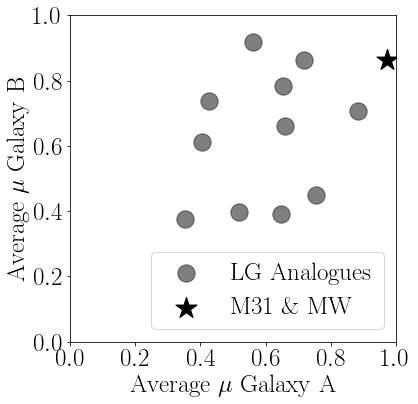

In [97]:
fig = plt.figure(1, figsize=(8,6))

norm_r = np.sqrt(data_halo_A['r_ab_x']**2 + data_halo_A['r_ab_y']**2 + data_halo_A['r_ab_z']**2)
norm_r_LG = np.sqrt(data_MW['r_ab_x']**2 + data_MW['r_ab_y']**2 + data_MW['r_ab_z']**2)


r_AB = data_halo_A[['r_ab_x','r_ab_y','r_ab_z']]
p_A = data_halo_A[['plane_x', 'plane_y', 'plane_z']]
i_A = data_halo_A[['Ia_x', 'Ia_y', 'Ia_z']]

p_B = data_halo_B[['plane_x', 'plane_y', 'plane_z']]
i_B = data_halo_B[['Ia_x', 'Ia_y', 'Ia_z']]


n_points = len(data_halo_A)
print(n_points)
volume_A = np.zeros(n_points)
volume_B = np.zeros(n_points)

def vol(a, b, c):
    v = (np.abs(np.sum(a*b)) + np.abs(np.sum(a*c)) + np.abs(np.sum(b*c)) )/3.0
    return v

for i in range(n_points):
    a = np.array([data_halo_A['r_ab_x'][i], data_halo_A['r_ab_y'][i], data_halo_A['r_ab_z'][i]])/norm_r[i]
    b = np.array([data_halo_A['plane_x'][i], data_halo_A['plane_y'][i], data_halo_A['plane_z'][i]])
    c = np.array([data_halo_A['Ia_x'][i], data_halo_A['Ia_y'][i], data_halo_A['Ia_z'][i]])
    M = np.array([a,b,c])
    volume_A[i] = np.abs(np.linalg.det(M))
    volume_A[i] = vol(a, b, c)
    
    
    a = np.array([data_halo_B['r_ab_x'][i], data_halo_B['r_ab_y'][i], data_halo_B['r_ab_z'][i]])/norm_r[i]
    b = np.array([data_halo_B['plane_x'][i], data_halo_B['plane_y'][i], data_halo_B['plane_z'][i]])
    c = np.array([data_halo_B['Ia_x'][i], data_halo_B['Ia_y'][i], data_halo_B['Ia_z'][i]])
    M = np.array([a,b,c])
    volume_B[i] = np.abs(np.linalg.det(M))
    volume_B[i] = vol(a, b, c)
    
a = np.array([data_MW['r_ab_x'], data_MW['r_ab_y'], data_MW['r_ab_z']])/norm_r_LG
b = np.array([data_MW['plane_x'], data_MW['plane_y'], data_MW['plane_z']])
c = np.array([data_MW['Ia_x'], data_MW['Ia_y'], data_MW['Ia_z']])
M = np.array([a,b,c])
volume_MW = np.abs(np.linalg.det(M))
volume_MW = vol(a, b, c)


a = np.array([data_M31['r_ab_x'], data_M31['r_ab_y'], data_M31['r_ab_z']])/norm_r_LG
b = np.array([data_M31['plane_x'], data_M31['plane_y'], data_M31['plane_z']])
c = np.array([data_M31['Ia_x'], data_M31['Ia_y'], data_M31['Ia_z']])
M = np.array([a,b,c])
volume_M31 = np.abs(np.linalg.det(M))
volume_M31 = vol(a, b, c)


print(volume_MW, volume_M31)
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)
plt.scatter(volume_A, volume_B, s=300, color='black', alpha=0.5, label='LG Analogues')
plt.scatter(volume_M31, volume_MW, label='M31 \& MW', s=500, marker='*', color='black')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=4)
plt.axes().set_aspect('equal')
plt.xlabel(r"Average $\mu$ Galaxy A")
plt.ylabel(r"Average $\mu$ Galaxy B")
plt.savefig("../paper/average_scatter.pdf", bbox_inches='tight')

In [93]:
n_iteration = 10000
volumes_MC = np.ones(n_iteration)*-1
for i in range(n_iteration):
    n_vectors = 3
    unit_vectors = np.zeros((n_vectors,3))
    costheta = (np.random.random(n_vectors)-0.5)*2.0
    theta = np.cos(costheta)
    phi = np.random.random(n_vectors) * 2.0 * np.pi
    unit_vectors[:,0] = np.sin(theta) * np.cos(phi)
    unit_vectors[:,1] = np.sin(theta) * np.sin(phi)
    unit_vectors[:,2] = np.cos(theta)
    a = unit_vectors[0,:]
    b = unit_vectors[1,:]
    c = unit_vectors[2,:]
    M = np.array([a,b,c])
    #l = np.abs(np.sum(unit_vectors[0,0]*unit_vectors[1,0] + 
    #            unit_vectors[0,1]*unit_vectors[1,1] +
    #          unit_vectors[0,1]*unit_vectors[1,2]))
    #if(l>0.9):
    volumes_MC[i] = np.abs(np.linalg.det(M))
    volumes_MC[i] = vol(a, b, c)
#volumes_MC = volumes_MC[volumes_MC>0]
volumes_MC = np.sort(volumes_MC)

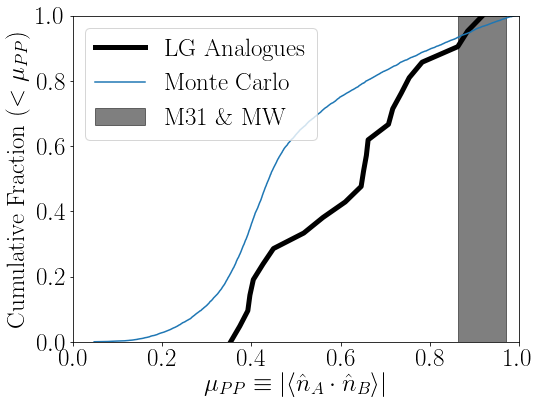

In [98]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

volume_all = np.sort(np.concatenate([volume_A, volume_B]))
n = len(volume_all)
cum_profile = np.linspace(0,1.0, n)
n_it = len(volumes_MC)

plt.plot(np.sort(volume_all), np.linspace(0,1.0,n), label='LG Analogues', color='black', linewidth=5)
plt.plot(volumes_MC, np.linspace(0,1.0,n_it), label='Monte Carlo')

plt.axvspan(volume_MW, volume_M31, color='black', label='M31 \& MW', alpha=0.5)
#plt.axes().set_aspect('equal')
plt.xticks(np.arange(-6,2,0.2))
plt.yticks(np.arange(-6,2,0.2))
plt.xlim([0,1])
plt.ylim([0,1.0])
plt.legend(loc=2)
plt.xlabel(r"$\mu_{PP}\equiv |\langle\hat{n}_{A}\cdot \hat{n}_{B}\rangle|$")
plt.ylabel(r"Cumulative Fraction ($<\mu_{PP}$)")
plt.savefig("../paper/average_cum.pdf", bbox_inches='tight')

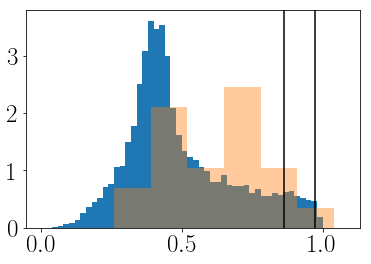

In [95]:
a = plt.hist(volumes_MC, bins=np.arange(0,1.1,0.02), normed=True)
a = plt.hist(volume_all, bins=np.arange(0,1.1,0.13), normed=True, alpha=0.4)

plt.axvline(x=volume_M31, color='black', label='LG Analogues')
plt.axvline(x=volume_MW, color='black', label='LG Analogues')


In [96]:
print(stats.ks_2samp(volumes_MC, volume_A))
print(stats.ks_2samp(volumes_MC, volume_B))
print(stats.ks_2samp(volumes_MC, volume_all))
print(stats.ks_2samp(volume_A, volume_B))

Ks_2sampResult(statistic=0.38697272727272725, pvalue=0.054536323888431312)
Ks_2sampResult(statistic=0.39546363636363635, pvalue=0.046482251400431739)
Ks_2sampResult(statistic=0.35000909090909088, pvalue=0.0066061465799703697)
Ks_2sampResult(statistic=0.27272727272727276, pvalue=0.7358400172522378)
